# Part II - Ford GoBike System Dataset Exploration
## by Ghadah Alabduljabbar


## Investigation Overview


We were intrested to know about the trends in GoBike custmers behaviour to be able to improve the business. So our main question is: Q: what are the features of the most trips taken in terms of duration, time period of day, day of the week, and members characteristics such as gender, type, and age?

At the end of performing all these exploration steps, we found a lot of useful information that can open a lot of future opportunities to improve and promote the business, and some of the key insights:

- Members’ bike trips usually take from 4 minutes to 10 minutes, and it’s rare they take more than 30 minutes.

- High percentage of GoBike members 90.09% don't use GoBike share for their entire trip, while only 9.91% are using it for their entire trip.

- On Tuesday highest number of users go on a bike trip in the morning while on Thursday they slightly prefer going at night, while Sunday and Saturday have the least number of trips, users on those days prefer to go on a trip in the afternoon.

- On average Weekends (Sunday and Saturday) have longer trips compared to other days, and that is probably because it’s the weekend and people have more free time.


## Dataset Overview

This dataset is taken from Ford GoBike a  public bicycle sharing system in California, the data contained information about GoBike members and all trips that were taken by them in February 2019.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('fordgobike_clean.csv')
df.head()

,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_gender,bike_share_for_all_trip,duration_min,trip_time,trip_day,trip_period,member_age
0,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,Male,No,869,17,Thursday,Night,38
1,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,Male,No,1030,12,Thursday,Afternoon,50
2,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,Other,No,608,17,Thursday,Night,33
3,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,Male,Yes,26,23,Thursday,Night,48
4,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,Male,No,29,23,Thursday,Night,63


## Trip Duration

Members’ bike trips usually take from 4 minutes to 10 minutes, and it’s rare they take more than 30 minutes.


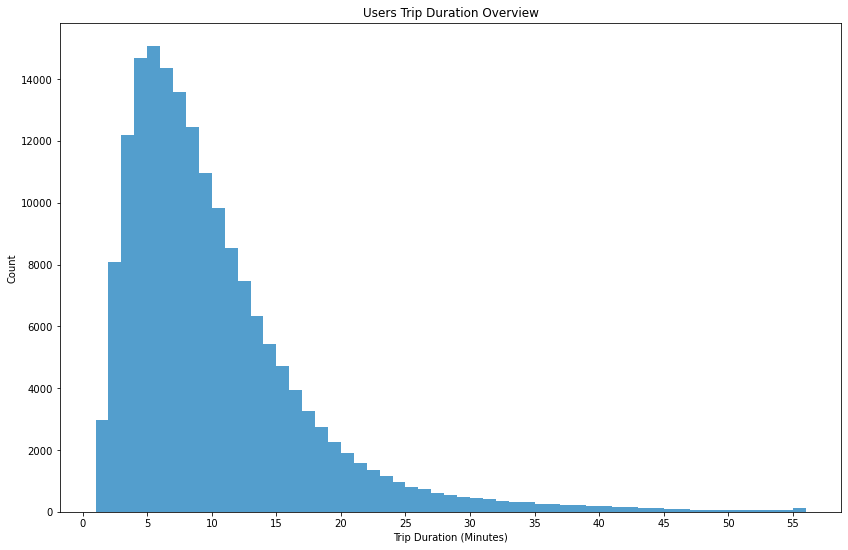

In [3]:
plt.figure(figsize=[14,9])
plt.xlabel('Trip Duration (Minutes)')
plt.ylabel('Count')
plt.title("Users Trip Duration Overview")
bins = np.arange(df['duration_min'].min(), df['duration_min'].quantile(0.99)+5, 1)
plt.xticks(np.arange(0, 60, 5), np.arange(0, 60, 5));
plt.hist(data = df, x = 'duration_min', bins=bins, color = sns.color_palette('Blues')[3]);

## Bike Share For All Trip

A high percentage of GoBike members **90.09%** don't use GoBike share for their entire trip, while only **9.91%** are using it for their entire trip.

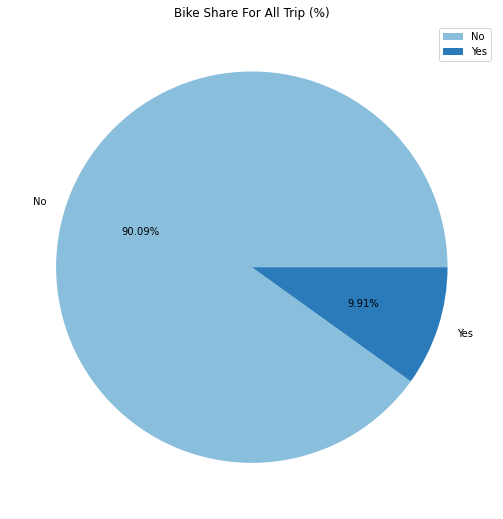

In [4]:
df.groupby(['bike_share_for_all_trip']).count().plot(kind='pie', labels=['No', 'Yes'], y='end_time',
                                    title="Bike Share For All Trip (%)", autopct='%.2f%%', 
                                    colors = [sns.color_palette('Blues')[2], sns.color_palette('Blues')[4]], 
                                       label="", figsize=(14,9));

## Period of The Day and Day of the Week

Tuesday and Thursday are the peaked days, and now we can see in Tuesday highest number of users go on a bike trip in the morning while on Thursday they slightly prefer going at night, while Sunday and Saturday have the least number of trips, users in those days prefer to go on a trip on the afternoon, and that probably because it’s the weekend.

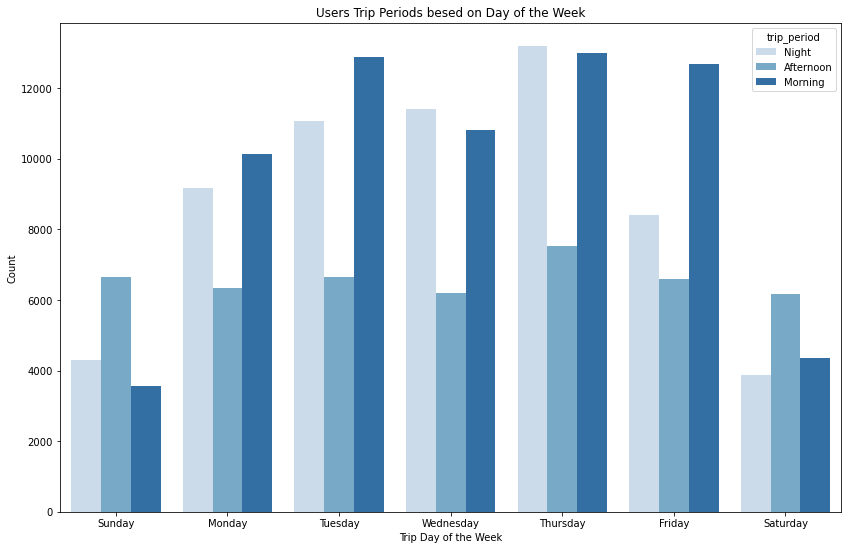

In [5]:
plt.figure(figsize=[14,9])
sns.countplot(data=df, x='trip_day', hue='trip_period',  palette='Blues', 
              order=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.xlabel('Trip Day of the Week')
plt.ylabel('Count')
plt.title("Users Trip Periods besed on Day of the Week");

## Average Trip Duration based on Trip Day and User Type

On average users both Subscribers and Customers have longer trips on the weekends (Sunday and Saturday), but on work days Subscribers tend to have the quickest trips on Wednesday while Customers have the shortest trips on Tuesday.

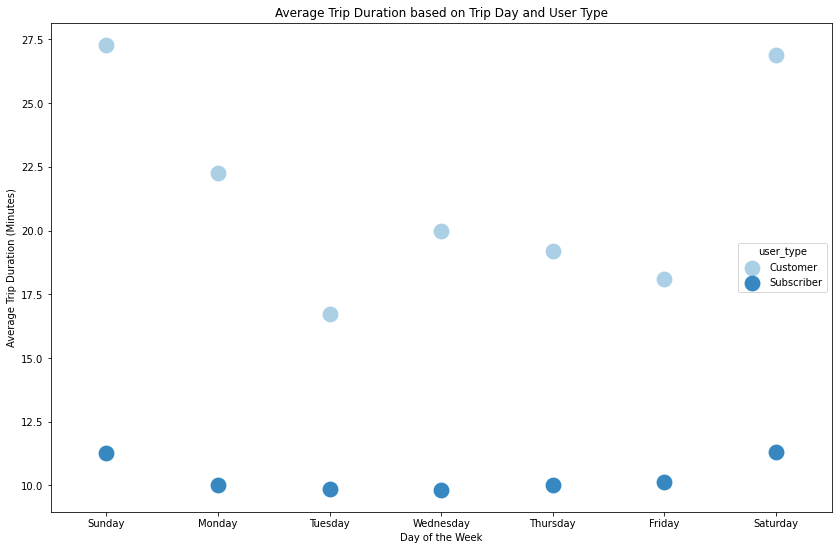

In [6]:
plt.figure(figsize=[14,9])
sns.pointplot(data=df, x='trip_day', y='duration_min', hue='user_type', linestyles="", ci=None, 
              scale=1.8, palette='Blues',
              order=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.xlabel('Day of the Week')
plt.ylabel('Average Trip Duration (Minutes)')
plt.title("Average Trip Duration based on Trip Day and User Type");

## Conclusion

At the end after performing all these exploration steps (Analysis and Visualisation), we did found a lot of useful information that can open a lot of future opportunities to improve and promote the business, and we did present some some of the key insights in this presentation.

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 676585 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
